BOSTON HOUSE PRICE PREDICTION

PROBLEM STATEMENT:Design and implement a regression model to
accurately predict Boston house prices.

TARGET OUTPUT:Solution should involve data preprocessing, model selection, training, and evaluation.

In [ ]:
#After mounting,we have to copy the path of the given dataset
import pandas as pd
file_path = '/HousingData.csv'
data = pd.read_csv(file_path)
print(data.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [ ]:
#Data preprocessing
print(data.isnull().sum())
data = data.fillna(data.mean())
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
print(data_scaled.head())


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.422328  0.296443 -1.311010 -0.279851 -0.144217  0.413672 -0.121059   
1 -0.419870 -0.489639 -0.599771 -0.279851 -0.740262  0.194274  0.378716   
2 -0.419872 -0.489639 -0.599771 -0.279851 -0.740262  1.282714 -0.270627   
3 -0.419277 -0.489639 -1.330435 -0.279851 -0.835284  1.016303 -0.828770   
4 -0.414981 -0.489639 -1.330435 -0.279851 -0.835284  1.228577 -0.522338   

        DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.104146  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.510353 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.239748  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0

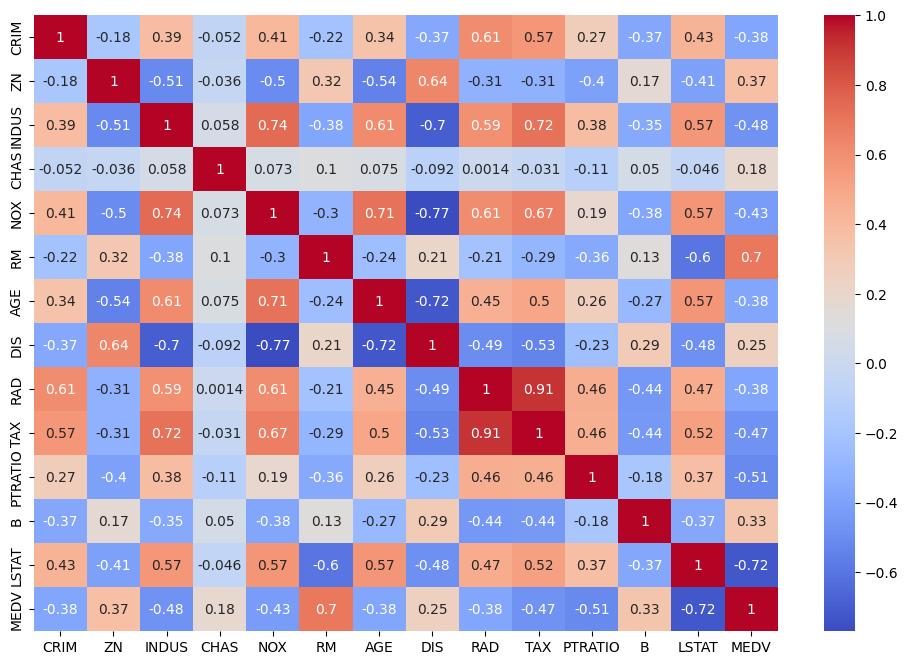

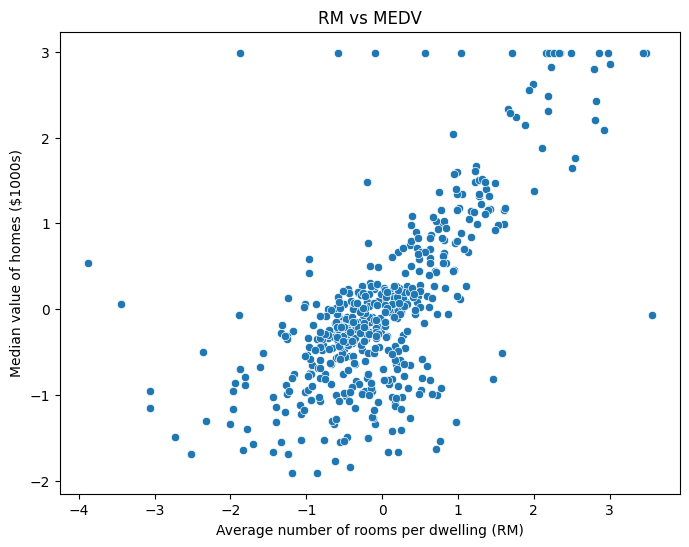

In [ ]:
#Exploratory Data Analysis(EDA)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(data_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled['RM'], y=data_scaled['MEDV'])
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of homes ($1000s)')
plt.title('RM vs MEDV')
plt.show()


In [ ]:
#Feature Engineering
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
rm_poly = poly.fit_transform(data_scaled[['RM']])
rm_poly_df = pd.DataFrame(rm_poly, columns=['RM', 'RM^2'])
data_scaled = pd.concat([data_scaled, rm_poly_df], axis=1)


In [ ]:
#Model Selection
from sklearn.model_selection import train_test_split
X = data_scaled.drop('MEDV', axis=1)
y = data_scaled['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Model Training
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
#Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

print("Decision Tree MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))

print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Linear Regression MAE: 0.26736467672819625
Linear Regression MSE: 0.18662027994605404
Linear Regression R2: 0.7851685741025684
Decision Tree MAE: 0.2872455779216805
Decision Tree MSE: 0.14368244036605696
Decision Tree R2: 0.8345972712655585
Random Forest MAE: 0.2284285246297084
Random Forest MSE: 0.11080786107991393
Random Forest R2: 0.872441458113107


In [ ]:
#Model Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
#Prediction
y_pred_best_rf = best_rf.predict(X_test)
print("Tuned Random Forest MAE:", mean_absolute_error(y_test, y_pred_best_rf))
print("Tuned Random Forest MSE:", mean_squared_error(y_test, y_pred_best_rf))
print("Tuned Random Forest R2:", r2_score(y_test, y_pred_best_rf))
new_data = X_test.iloc[0:5]
new_predictions = best_rf.predict(new_data)
print("Predicted prices for new data:", new_predictions)


Tuned Random Forest MAE: 0.22505527418269355
Tuned Random Forest MSE: 0.09751375529561149
Tuned Random Forest R2: 0.8877452166462019
Predicted prices for new data: [ 0.10958414  0.9424448  -0.58907991  0.11099903 -0.63722235]


In [ ]:
#Model Deployment
import joblib
joblib.dump(best_rf, 'best_rf_model.pkl')
loaded_model = joblib.load('best_rf_model.pkl')
